In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Importing the self defined functions from python file.\
Function to access dataset and functions with predictive model is included in the python file.

In [2]:
from capstone_group import getData, getFertilityModelLR, getFertilityModelDT, getFertilityModelRF, getHDIModel, getGDPModelLR, getGDPModelRF

The dataset we are using contains data for multiple countries regarding different fields like literacy, GDP, fertility rate, etc. To have a data set with such high attributes, we have combined multiple datasets from the World Bank website for different fields. We have removed the unwanted columns from all the data frames. Then we have updated the column names so that we can combine the data together. We have melted the dataset into required form and merged all the data frames together. This gave us the required dataset for multiple countries with data for different fields.

Importing the metrics to check and compare the accuracy of the models.

In [3]:
from sklearn.metrics import r2_score, mean_squared_error

Calling self defined function which will access data from multiple files and return cleaned dataset.

In [4]:
final_df = getData()

Since the data is timeseries dataset, most of the attributes in dataset are numeric.\
We can observe the same thing from from the info of the dataset.

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11764 entries, 0 to 11763
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    11764 non-null  object 
 1   Year            11764 non-null  int64  
 2   Exports         7648 non-null   float64
 3   Fertility Rate  10409 non-null  float64
 4   GDP             9053 non-null   float64
 5   GDP_PC          9053 non-null   float64
 6   Imports         6052 non-null   float64
 7   Literacy        4829 non-null   float64
 8   Population      11222 non-null  float64
 9   R_And_D         2687 non-null   float64
 10  Unemployment    4867 non-null   float64
 11  HDI             5180 non-null   float64
 12  Region          8260 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 1.2+ MB


We can observe the actual values in the dataset below.\
We can also observe that many NaN values are present in it, this has happened because the data for that particular year may not have been recorded.

In [6]:
final_df

,Country Name,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI,Region
0,Afghanistan,1960,2.222223e+07,7.450,5.377778e+08,59.773234,NaN,NaN,8996967.0,NaN,NaN,NaN,SA
1,Afghanistan,1961,2.444446e+07,7.450,5.488889e+08,59.860900,NaN,NaN,9169406.0,NaN,NaN,NaN,SA
2,Afghanistan,1962,2.666668e+07,7.450,5.466667e+08,58.458009,NaN,NaN,9351442.0,NaN,NaN,NaN,SA
3,Afghanistan,1963,6.888892e+07,7.450,7.511112e+08,78.706429,NaN,NaN,9543200.0,NaN,NaN,NaN,SA
4,Afghanistan,1964,7.111114e+07,7.450,8.000000e+08,82.095307,NaN,NaN,9744772.0,NaN,NaN,NaN,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11759,Zimbabwe,2017,3.456997e+09,3.707,1.758489e+10,1235.189032,7.493755e+09,88.69342,14236599.0,NaN,4.785,0.594,SSA
11760,Zimbabwe,2018,5.081366e+09,3.615,1.811554e+10,1254.642265,4.995969e+09,88.69342,14438812.0,NaN,4.796,0.602,SSA
11761,Zimbabwe,2019,6.026541e+09,3.531,1.928429e+10,1316.740657,4.995969e+09,88.69342,14645473.0,NaN,4.833,0.601,SSA
11762,Zimbabwe,2020,6.715439e+09,3.460,1.805117e+10,1214.509820,4.995969e+09,88.69342,14862927.0,NaN,5.351,0.600,SSA


Since the dataset we are using contains time series data, many null values are present in it  since the data for that particular year may not have been recorded. Changing the value to mean can not be a good solution for such fields since the time series dataset contains some pattern and adding mean at multiple places can affect the predictive capability from the data. Therefore we have used the interpolation technique for adding linear values in the dataset. These values are updated according to specific countries so that data from one country does not affect the NaN value of the other country. 

We can not have null values in attribute which we are trying to predict.\
Therefore, we are only using the entries with HDI value as dataset for HDI model and visualisation.

In [7]:
df_HDI = final_df.dropna(subset = ['HDI'])
df_HDI

,Country Name,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI,Region
30,Afghanistan,1990,3.577778e+08,7.466,3.725813e+09,227.817789,NaN,22.726520,12412311.0,NaN,NaN,0.273,SA
31,Afghanistan,1991,3.577778e+08,7.479,3.753260e+09,223.785189,NaN,23.141869,13299016.0,NaN,10.649,0.279,SA
32,Afghanistan,1992,3.577778e+08,7.502,3.780707e+09,219.752588,NaN,23.557218,14485543.0,NaN,10.821,0.287,SA
33,Afghanistan,1993,3.577778e+08,7.535,3.808155e+09,215.719987,NaN,23.972567,15816601.0,NaN,10.723,0.297,SA
34,Afghanistan,1994,3.577778e+08,7.572,3.835602e+09,211.687386,NaN,24.387917,17075728.0,NaN,10.726,0.292,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11759,Zimbabwe,2017,3.456997e+09,3.707,1.758489e+10,1235.189032,7.493755e+09,88.693420,14236599.0,NaN,4.785,0.594,SSA
11760,Zimbabwe,2018,5.081366e+09,3.615,1.811554e+10,1254.642265,4.995969e+09,88.693420,14438812.0,NaN,4.796,0.602,SSA
11761,Zimbabwe,2019,6.026541e+09,3.531,1.928429e+10,1316.740657,4.995969e+09,88.693420,14645473.0,NaN,4.833,0.601,SSA
11762,Zimbabwe,2020,6.715439e+09,3.460,1.805117e+10,1214.509820,4.995969e+09,88.693420,14862927.0,NaN,5.351,0.600,SSA


We can check the description of the final dataset in the below cell.\
We can observe the minimum and maximum values for all the attributes in this.\
We find that there is large difference between the max/min value and the mean of the attribute.\
This is because the data contains different countries with less GDP and countries with high GDP.\
Therefore we observe this denormalization in the data.\
We can not consider these values as outliers since they are actual values for a particular country.\
This data is collected from World Bank, which is reliable source.\
Therefore we should not remove the data just because it appears to be out of the inter-qurtile range.

In [8]:
final_df.describe()

,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI
count,11764.000000,7.648000e+03,10409.000000,9.053000e+03,9053.000000,6.052000e+03,4829.000000,1.122200e+04,2687.000000,4867.000000,5180.000000
mean,1991.112037,5.746761e+10,3.909263,2.000246e+11,9508.991033,7.190925e+10,78.485617,2.684864e+07,0.826506,7.998400,0.670045
std,17.874410,1.981669e+11,2.009873,1.055363e+12,18508.138183,2.123735e+11,23.704466,1.124994e+08,0.902799,6.114991,0.165502
min,1960.000000,6.932810e+05,0.900000,8.824448e+06,12.802812,1.161657e+06,5.404650,2.833000e+03,0.005440,0.100000,0.216000
25%,1976.000000,6.030235e+08,2.060000,1.518797e+09,554.833916,2.646944e+09,66.030113,5.905482e+05,0.193675,3.778500,0.543000
50%,1992.000000,3.453790e+09,3.401000,7.872333e+09,2124.618526,1.007387e+10,88.314313,4.336952e+06,0.457130,6.230000,0.695000
75%,2007.000000,2.318498e+10,5.806000,5.430086e+10,9446.700772,4.584590e+10,97.344162,1.314280e+07,1.151370,10.664500,0.800000
max,2021.000000,3.548553e+12,8.462000,2.299610e+13,189487.147128,3.118289e+12,99.999947,1.412360e+09,5.435620,37.939999,0.962000


The below cell shows the correlation between the different attributes and is very helpful to understand how one attribute affects other.

From this we can observe that the attribute HDI is impacted by the field Literacy, R_And_D and GDP_PC.\
HDI is inversely proportional to the Fertility Rate.\
These attributes affect HDI attribute the most.

We can also observe that the attribute Fertility Rate is reversely impacted by the field Literacy and GDP_PC.

The attribute GDP is impacted by the field Exports and Imports.\
The impact of Imports here does not reflect that if we increase the imports, GDP will increase. This do show how economically strong a nation is.\
This may be explained as the nations with a high GDP are able to spend more on imports than those with a lower GDP.

We are going to create model for predicting these attributes, therefore we will focus more on these attributes.

In [9]:
final_df.corr()

,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI
Year,1.000000,0.216438,-0.469140,0.132550,0.339208,0.176562,0.197095,0.062879,-0.016791,-0.035873,0.244511
Exports,0.216438,1.000000,-0.276360,0.872462,0.419315,0.959937,0.163618,0.393632,0.509455,-0.085679,0.362969
Fertility Rate,-0.469140,-0.276360,1.000000,-0.185427,-0.456787,-0.279202,-0.812801,-0.088017,-0.361203,-0.151945,-0.862751
GDP,0.132550,0.872462,-0.185427,1.000000,0.205849,0.935768,0.110970,0.383174,0.396624,-0.058557,0.236574
GDP_PC,0.339208,0.419315,-0.456787,0.205849,1.000000,0.425811,0.383505,-0.044552,0.490380,-0.105350,0.648508
Imports,0.176562,0.959937,-0.279202,0.935768,0.425811,1.000000,0.195895,0.387536,0.490738,-0.078771,0.363645
Literacy,0.197095,0.163618,-0.812801,0.110970,0.383505,0.195895,1.000000,-0.024601,0.208472,0.175560,0.846715
Population,0.062879,0.393632,-0.088017,0.383174,-0.044552,0.387536,-0.024601,1.000000,0.089346,-0.091863,-0.034604
R_And_D,-0.016791,0.509455,-0.361203,0.396624,0.490380,0.490738,0.208472,0.089346,1.000000,-0.096192,0.631152
Unemployment,-0.035873,-0.085679,-0.151945,-0.058557,-0.105350,-0.078771,0.175560,-0.091863,-0.096192,1.000000,0.056315


From the correlation of the Data we get that the HDI is highly affected by the values for Fertility Rate, GDP per capita and Literacy rate. We can create models with these attributes to predict the HDI. \
So to increase the HDI we need to work on  increasing the GDP per capita and Literacy of a country.

But it is not that easy, because we can observe that the Literacy rate and fertility rate are inversely dependent. That means if we increase the literacy rate we may end up with a low fertility rate. This is a very serious issue for many countries and the effect of low fertility rate is observed after 30 to 40 years as a result of the older population in the country. We can observe the issue caused by low fertility rates in countries like South Korea and China. To save countries from this issue we have created a model which can help with predicting the fertility rate of a country.


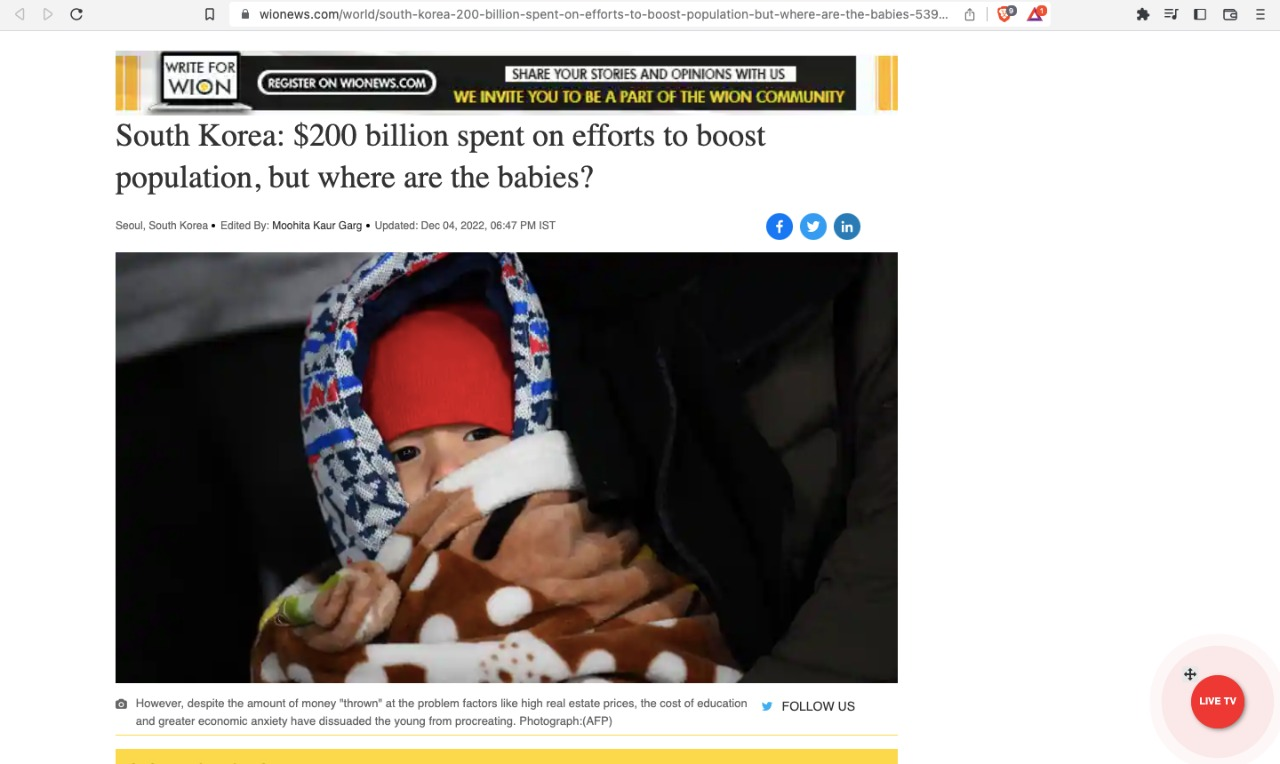

For visualisation, we are showing the data from year 2020.

In [10]:
df_2020 = final_df[final_df.Year == 2020]
df_2020

,Country Name,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI,Region
60,Afghanistan,2020,3.577778e+08,4.176,2.011614e+10,516.747871,NaN,36.684322,38928341.0,NaN,11.710,0.483,SA
122,Albania,2020,3.435536e+09,1.580,1.513187e+10,5332.160475,4.935757e+09,98.141151,2837849.0,0.15412,13.329,0.794,ECA
184,Algeria,2020,2.610336e+10,2.942,1.450092e+11,3306.858208,4.112604e+10,81.407837,43851043.0,0.53432,12.550,0.736,AS
246,American Samoa,2020,4.260000e+08,NaN,7.090000e+08,12844.900991,6.070256e+08,97.344162,55197.0,0.39552,NaN,NaN,NaN
308,Andorra,2020,NaN,1.270,2.891001e+09,37416.697720,NaN,NaN,77265.0,NaN,NaN,0.848,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11574,Vanuatu,2020,1.568123e+08,3.707,8.968279e+08,2919.836800,4.118779e+08,87.506310,307150.0,NaN,2.119,0.608,EAP
11606,Viet Nam,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710,EAP
11638,Yemen,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460,AS
11700,Zambia,2020,8.473994e+09,4.496,1.811063e+10,985.132436,9.079984e+09,86.747963,18383956.0,0.27819,12.848,0.570,SSA


In the below cell, we have data for HDI of top 4 and bottom 3 countries for visualisation.

In [11]:
df_2020_HDI_sort = df_2020.sort_values(['HDI', 'R_And_D'], ascending = False).dropna(subset=['HDI', 'R_And_D']).iloc[np.r_[:4, -3:0]].sort_values('R_And_D', ascending = False).reset_index(drop = True)
df_2020_HDI_sort

,Country Name,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI,Region
0,Switzerland,2020,4.689666e+11,1.460,7.522480e+11,87100.414821,3.564901e+11,NaN,8636561.0,3.14686,4.820,0.956,NaN
1,Denmark,2020,1.954249e+11,1.670,3.560849e+11,61063.316430,1.649798e+11,NaN,5831404.0,2.96154,5.640,0.947,NaN
2,Iceland,2020,7.430509e+09,1.720,2.171808e+10,59264.034091,7.178592e+09,NaN,366463.0,2.47176,5.480,0.957,NaN
3,Norway,2020,1.167918e+11,1.480,3.621983e+11,67329.677791,1.214142e+11,NaN,5379475.0,2.27601,4.420,0.959,NaN
4,Chad,2020,2.862741e+09,5.553,1.071540e+10,652.349210,3.801089e+09,22.311550,16425859.0,0.30050,1.742,0.397,SSA
5,Burundi,2020,1.264944e+08,5.237,2.780511e+09,233.837510,7.344790e+08,68.375328,11890781.0,0.21312,1.707,0.426,SSA
6,Mali,2020,5.354301e+09,5.693,1.746539e+10,862.453012,4.460403e+09,30.761410,20250834.0,0.15768,7.696,0.427,SSA


In the below cell, we have data for Fertility Rate of top and bottom 4 countries for visualisation.

In [12]:
df_2020_fertility_rate = df_2020.sort_values(['Literacy', 'Fertility Rate'], ascending = [False, True]).dropna(subset=['Fertility Rate', 'Literacy']).iloc[np.r_[:4, -4:0]].reset_index(drop = True)
df_2020_fertility_rate

,Country Name,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI,Region
0,Uzbekistan,2020,1.454717e+10,2.900,5.989431e+10,1749.655815,2.251166e+10,99.999947,34232050.0,0.13918,7.041,0.721,ECA
1,Ukraine,2020,6.080163e+10,1.217,1.566179e+11,3751.740723,6.313891e+10,99.974350,44132049.0,0.40608,9.132,0.775,ECA
2,Latvia,2020,2.033470e+10,1.550,3.364546e+10,17703.953443,2.031299e+10,99.889313,1900449.0,0.70550,8.100,0.871,NaN
3,Estonia,2020,2.181559e+10,1.580,3.065029e+10,23054.358491,2.061675e+10,99.885788,1329479.0,1.79247,6.800,0.892,NaN
4,South Sudan,2020,4.397356e+09,4.543,1.199780e+10,1119.651437,3.467364e+09,34.522758,11193729.0,NaN,14.030,0.386,SSA
5,Mali,2020,5.354301e+09,5.693,1.746539e+10,862.453012,4.460403e+09,30.761410,20250834.0,0.15768,7.696,0.427,SSA
6,Chad,2020,2.862741e+09,5.553,1.071540e+10,652.349210,3.801089e+09,22.311550,16425859.0,0.30050,1.742,0.397,SSA
7,Somalia,2020,1.178000e+09,5.885,6.965285e+09,438.255166,3.987000e+09,5.404650,15893219.0,NaN,19.723,NaN,AS


In the below cell, we have timeseries data of China for Fertility Rate for visualisation.\
We are containing the data from year 1982 since we don't data before that.

In [39]:
china_df = final_df[final_df['Country Name'] == 'China'].sort_values('Year').iloc[-40:]
china_df

,Country Name,Year,Exports,Fertility Rate,GDP,GDP_PC,Imports,Literacy,Population,R_And_D,Unemployment,HDI,Region
2286,China,1982,1.632471e+10,2.536,2.050897e+11,203.334920,NaN,65.505089,1.008630e+09,NaN,NaN,NaN,EAP
2287,China,1983,1.662033e+10,2.561,2.306867e+11,225.431929,NaN,67.040085,1.023310e+09,NaN,NaN,NaN,EAP
2288,China,1984,2.051900e+10,2.607,2.599465e+11,250.713969,NaN,68.575081,1.036825e+09,NaN,NaN,NaN,EAP
2289,China,1985,2.577244e+10,2.650,3.094880e+11,294.458849,NaN,70.110077,1.051040e+09,NaN,NaN,NaN,EAP
2290,China,1986,2.622385e+10,2.666,3.007581e+11,281.928121,NaN,71.645073,1.066790e+09,NaN,NaN,NaN,EAP
2291,China,1987,2.843555e+10,2.643,2.729730e+11,251.811957,NaN,73.180069,1.084035e+09,NaN,NaN,NaN,EAP
2292,China,1988,3.440545e+10,2.575,3.123536e+11,283.537695,NaN,74.715065,1.101630e+09,NaN,NaN,NaN,EAP
2293,China,1989,3.139422e+10,2.460,3.477681e+11,310.881912,NaN,76.250061,1.118650e+09,NaN,NaN,NaN,EAP
2294,China,1990,4.493259e+10,2.309,3.608579e+11,317.884673,NaN,77.785057,1.135185e+09,NaN,NaN,0.484,EAP
2295,China,1991,5.151146e+10,2.140,3.833733e+11,333.142145,NaN,79.098573,1.150780e+09,NaN,2.370,0.492,EAP


Visualisation

Below we can observe that the HDI increases as the GDP per capita increases.\
We can also observe the same pattern for HDI with Fertility rate and Literacy from the below plot.\
The color of a point represents Fertility rate and size of a point represents Literacy of a country.\
From this, we get that the attributes are highly correlated.

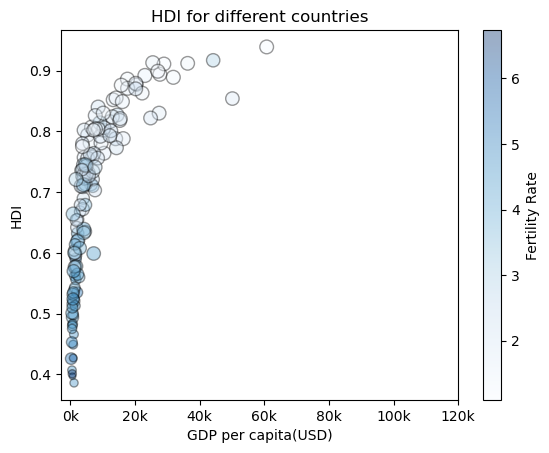

In [16]:
plt.scatter(df_2020.GDP_PC, df_2020.HDI, s = (df_2020.Literacy), c = df_2020["Fertility Rate"], cmap = 'Blues', alpha = 0.4, edgecolor = 'black')
cbar = plt.colorbar()
cbar.set_label('Fertility Rate')
plt.xlabel('GDP per capita(USD)')
plt.ylabel('HDI')
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000],
           ['0k', '20k', '40k', '60k', '80k', '100k', '120k'])
plt.title('HDI for different countries')
plt.savefig('HDI for different countries')
plt.show()

We can observe some points with high Fertility Rate are having high HDI value.\
This is because of one more factor which is spending on Research and Development.\
Countries with high HDI value, spend more % of their GDP on R and D.

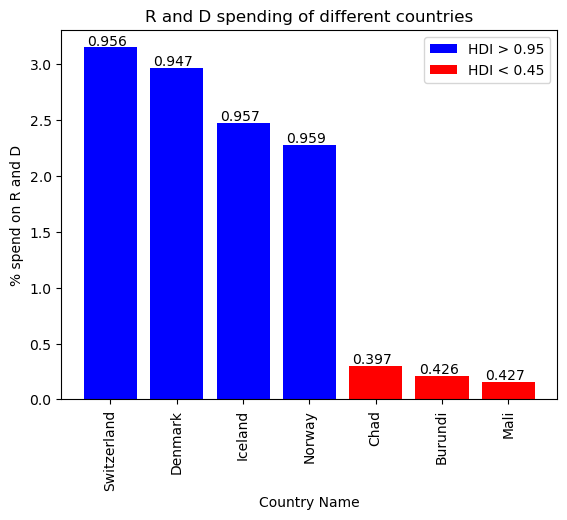

In [17]:
plt.bar(df_2020_HDI_sort['Country Name'].iloc[:4], df_2020_HDI_sort.R_And_D.iloc[:4], color = "Blue", label = "HDI > 0.95")
plt.bar(df_2020_HDI_sort['Country Name'].iloc[-3:], df_2020_HDI_sort.R_And_D.iloc[-3:], color = "red", label = "HDI < 0.45")
plt.xticks(rotation = 90)
for i in range(len(df_2020_HDI_sort.R_And_D)):
    plt.text(x = (i-0.35), y = df_2020_HDI_sort.R_And_D.iloc[i]+0.020, s = df_2020_HDI_sort.HDI.iloc[i])
plt.legend()
plt.xlabel('Country Name')
plt.ylabel('% spend on R and D')
plt.title('R and D spending of different countries')
plt.savefig('R and D spending of different countries')
plt.show()

Below we can observe that the countries with high literacy have less fertility rate.\
From this plot we can conclude that the high literacy results into low fertility rate.

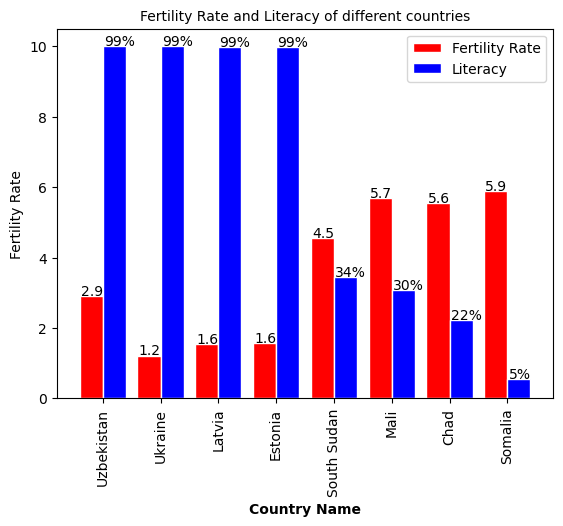

In [18]:
barWidth = 0.4
fontsize = 10

bars1 = df_2020_fertility_rate['Fertility Rate']
bars2 = df_2020_fertility_rate['Literacy']/10

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='Red', width=barWidth, edgecolor='white', label='Fertility Rate')
plt.bar(r2, bars2, color='Blue', width=barWidth, edgecolor='white', label='Literacy')

for i in range(len(r2)):
    plt.text(x = (r1[i]-0.18), y = df_2020_fertility_rate['Fertility Rate'].iloc[i]+0.020, s = round(df_2020_fertility_rate['Fertility Rate'].iloc[i],1), fontsize = fontsize)
    plt.text(x = (r2[i]-0.18), y = (df_2020_fertility_rate['Literacy'].iloc[i]/10)+0.020, s = str(math.floor(df_2020_fertility_rate['Literacy'].iloc[i]))+"%", fontsize = fontsize)

plt.xlabel('Country Name', fontweight='bold', fontsize = fontsize)
plt.xticks([r + (barWidth/2) for r in range(len(bars1))], df_2020_fertility_rate['Country Name'], fontsize = fontsize)
plt.xticks(rotation = 90)
plt.yticks(fontsize = fontsize)

plt.xlabel('Country Name', fontsize = fontsize)
plt.ylabel('Fertility Rate', fontsize = fontsize)
plt.title('Fertility Rate and Literacy of different countries', fontsize = fontsize)

plt.legend(fontsize = fontsize)
plt.savefig('Fertility Rate and Literacy of different countries')
plt.show()

Below cell provides timeseries data for China and compaires its literacy rate with the fertility rate.\
From this plot we can observe the impact of increase in literacy rate on fertility rate of China.\
We can observe how increase in literacy rate, reduced the fertility rate of China.

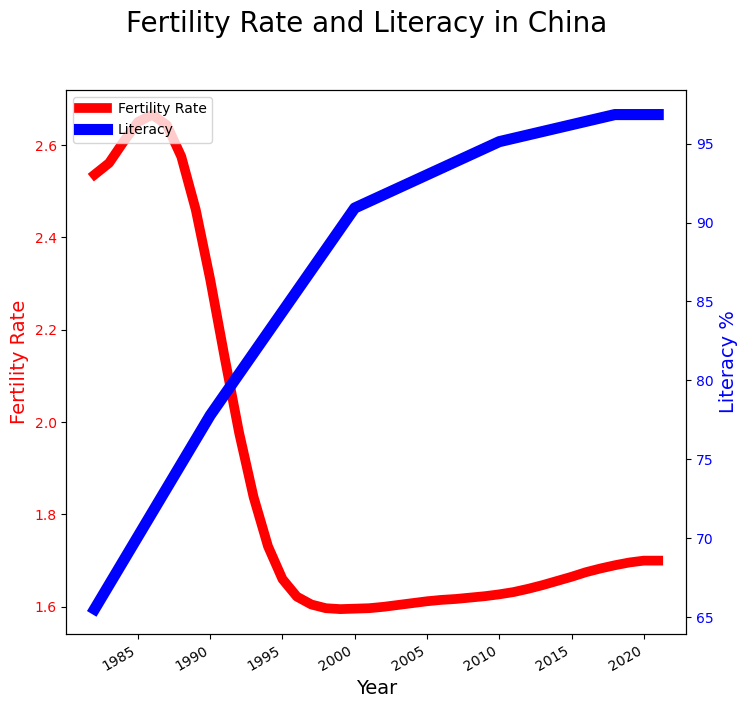

In [19]:
COLOR_Fertility_Rate = "Red"
COLOR_Literacy = "Blue"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

plot_1 = ax1.plot(china_df['Year'], china_df['Fertility Rate'], color = COLOR_Fertility_Rate, lw = 7, label = 'Fertility Rate')
plot_2 = ax2.plot(china_df['Year'], china_df['Literacy'], color = COLOR_Literacy, lw = 8, label = 'Literacy')

lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Fertility Rate", color=COLOR_Fertility_Rate, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_Fertility_Rate)

ax2.set_ylabel("Literacy %", color=COLOR_Literacy, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_Literacy)

fig.suptitle("Fertility Rate and Literacy in China", fontsize=20)
plt.savefig('Fertility Rate and Literacy in China')
fig.autofmt_xdate()


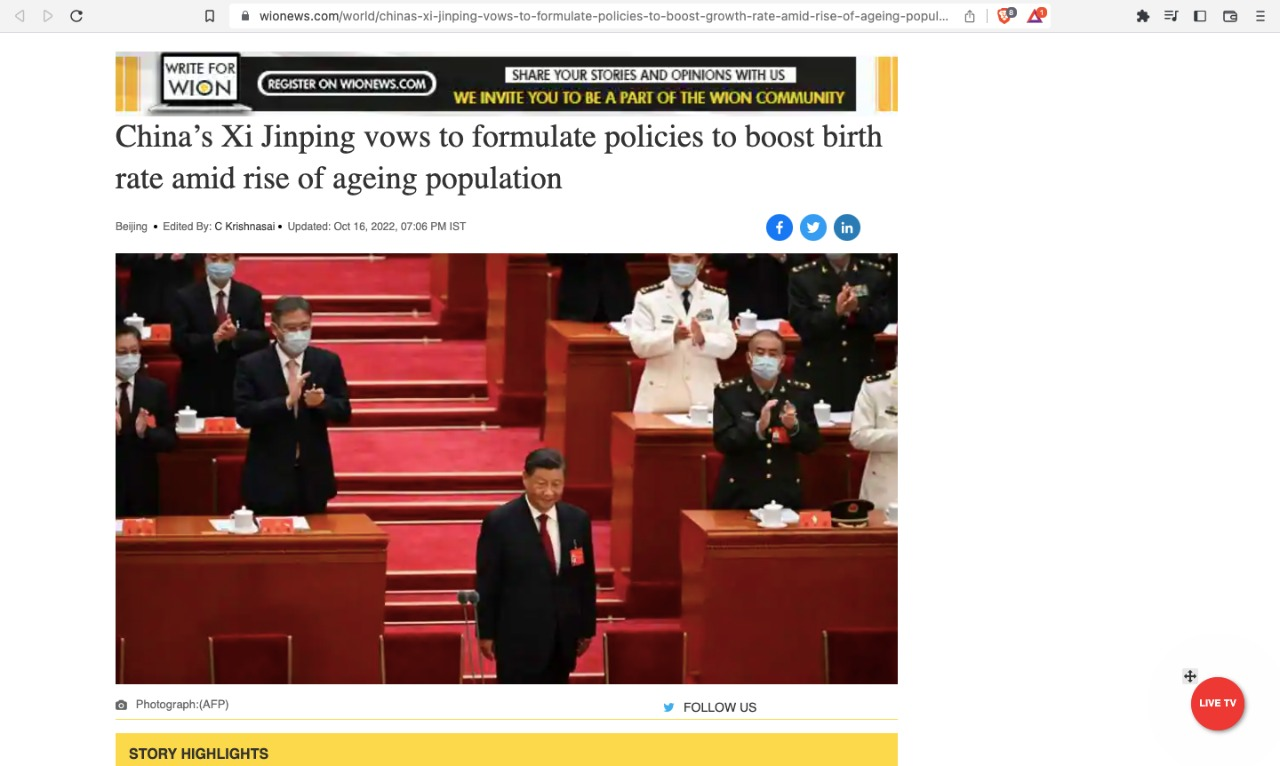

Below we can observe that the GDP increases as the Exports and Imports increases.\
The color of a point represents Imports for a country.\
From this, we get that the attributes are highly correlated.

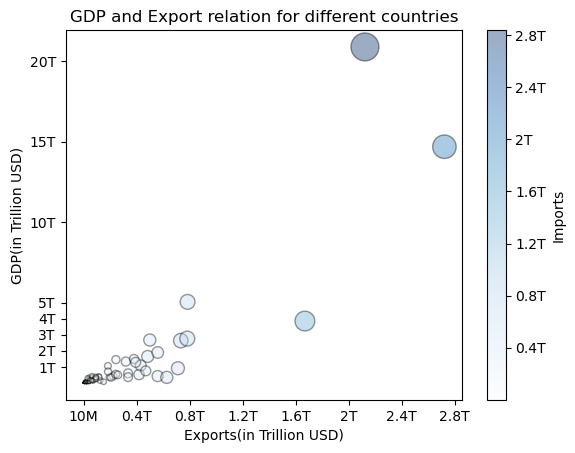

In [20]:
plt.scatter(df_2020.Exports, df_2020.GDP, s = df_2020.Imports/7000000000, c = df_2020.Imports, cmap = 'Blues', alpha = 0.4, edgecolor = 'black')
cbar = plt.colorbar(ticks = [10000000, 400000000000, 800000000000,
              1200000000000, 1600000000000, 2000000000000,
              2400000000000, 2800000000000])
cbar.set_label('Imports')
cbar.ax.set_yticklabels(['10M', '0.4T', '0.8T', '1.2T', '1.6T','2T', '2.4T', '2.8T'])
plt.xlabel('Exports(in Trillion USD)')
plt.ylabel('GDP(in Trillion USD)')
plt.xticks([10000000, 400000000000, 800000000000,
              1200000000000, 1600000000000, 2000000000000,
              2400000000000, 2800000000000],
           ['10M', '0.4T', '0.8T',
             '1.2T', '1.6T','2T',
              '2.4T', '2.8T'])
plt.yticks([1000000000000, 2000000000000, 3000000000000,
              4000000000000, 5000000000000, 10000000000000,
              15000000000000, 20000000000000],
           ['1T', '2T','3T',
             '4T', '5T','10T',
              '15T', '20T'])

plt.title('GDP and Export relation for different countries')
plt.savefig('GDP and Export relation for different countries')
plt.show()

To find the economic success of a country we have created a model which can predict the GDP of a country. 

We can observe that the GDP of a country is affected by imports and exports. But we know that exports do not contribute to increasing the GDP, but it is a representation of how strong a country is GDP wise. This can be stated as countries with high GDP can spend more on imports whereas countries which don't have such high GDP can not. This scenario we have seen recently in Bangladesh and Pakistan, where governments have asked people not to import products from the global market. This shows that countries with higher GDP can afford to have high imports whereas opposite for countries with less GDP.


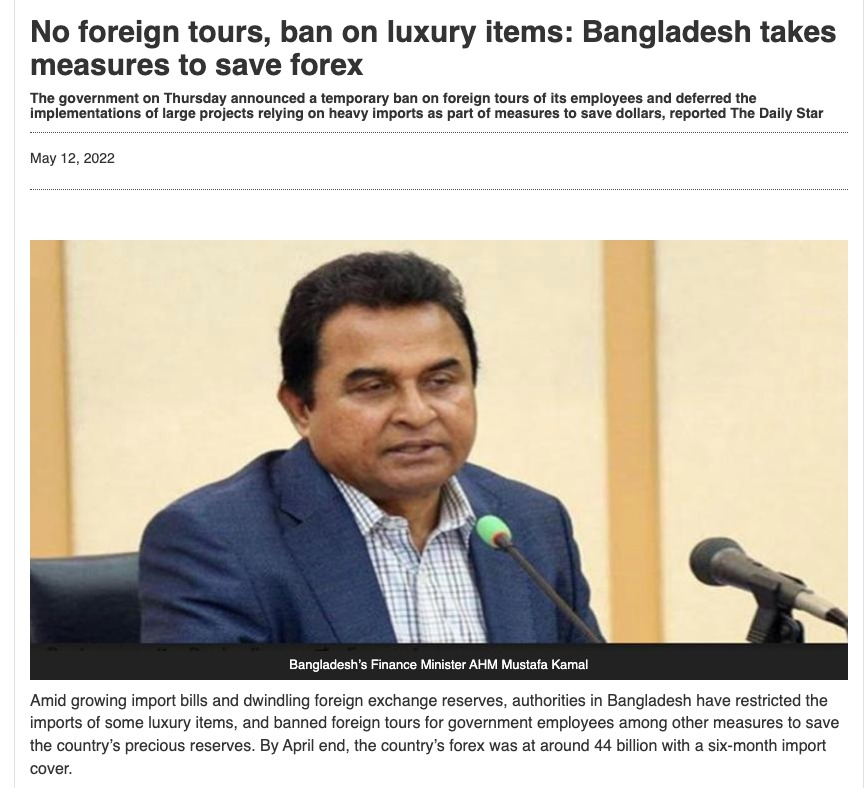

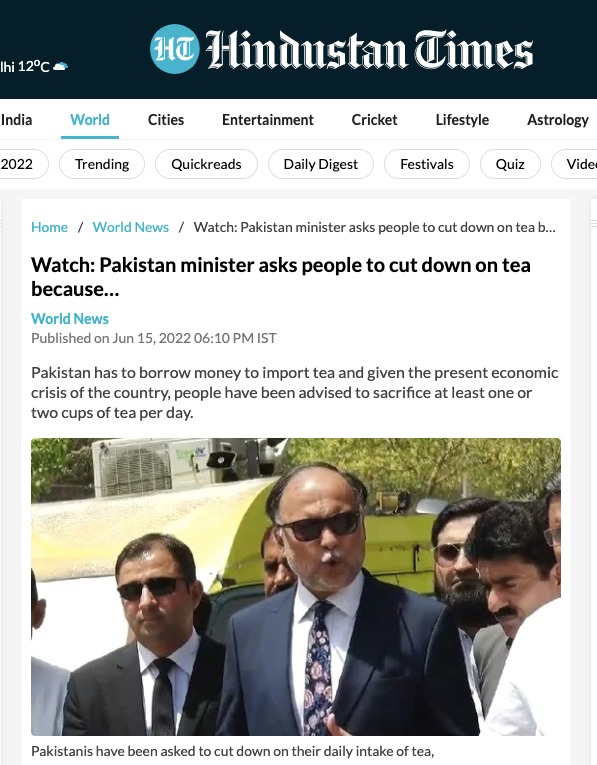

We can use decision tree regression model to predict the HDI value from the Literacy rate, R And D and GDP per capita.\
We are using testing data to predict the accuracy of the model.

In [21]:
HDI_X_train, HDI_X_test, HDI_y_train, HDI_y_test, HDI_regr = getHDIModel(final_df)

In [22]:
HDI_y_pred = HDI_regr.predict(HDI_X_test)
print("mean_squared_error:",mean_squared_error(HDI_y_test, HDI_y_pred))
print('r2_score:',r2_score(HDI_y_test, HDI_y_pred))
print(HDI_regr.score(HDI_X_test, HDI_y_test))

mean_squared_error: 0.0023466740369779524
r2_score: 0.9191017877003297
0.9191017877003297


The decision tree regression model have the accuracy of 91%, which is a good accuracy for prediction model.

Below we can observe the result of the predicted values with the actual values.

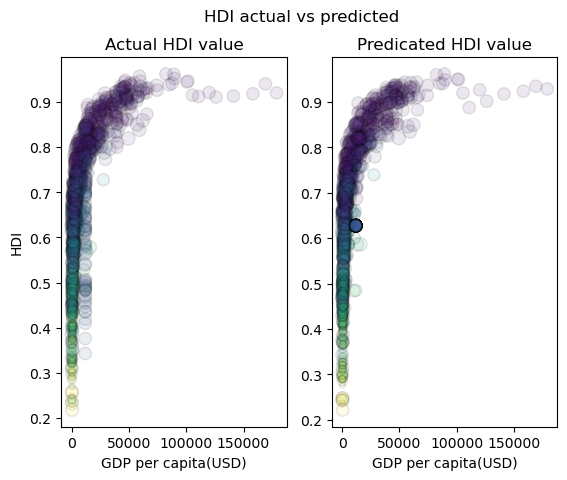

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('HDI actual vs predicted')

ax1.scatter(HDI_X_test.GDP_PC, HDI_y_test, s = (HDI_X_test.Literacy), c = HDI_X_test["Fertility Rate"], alpha = 0.1, edgecolor = 'black')
ax1.set_title('Actual HDI value')
ax1.set_xlabel('GDP per capita(USD)')
ax1.set_ylabel('HDI')

ax2.scatter(HDI_X_test.GDP_PC, HDI_y_pred, s = (HDI_X_test.Literacy), c = HDI_X_test["Fertility Rate"], alpha = 0.1, edgecolor = 'black')
ax2.set_title('Predicated HDI value')
ax2.set_xlabel('GDP per capita(USD)')

plt.savefig('HDI actual vs predicted')
plt.show()

We have used multiple models to predict the Fertility rate value from the Literacy rate and GDP per capita.\
We have used Linear Regression, Decision Tree and Random Forest model for comparison.\
We are using testing data to predict the accuracy of the model to compare with other models and decide which model to use.

Linear Regression

In [24]:
F_X_train, F_X_test, F_y_train, F_y_test, fertility_regr = getFertilityModelLR(final_df)

In [25]:
F_y_pred = fertility_regr.predict(F_X_test)
r2_score_LR = r2_score(F_y_test, F_y_pred)
print("mean_squared_error:",mean_squared_error(F_y_test, F_y_pred))
print('r2_score:',r2_score(F_y_test, F_y_pred))
print(fertility_regr.score(F_X_test, F_y_test))

mean_squared_error: 2.6333164210378337
r2_score: 0.3454586473800896
0.3454586473800896


For Linear Regression we can observe that the accuracy is 34%, which is low.

Decision Tree

In [26]:
F_X_train, F_X_test, F_y_train, F_y_test, fertility_regr = getFertilityModelDT(final_df)

In [27]:
F_y_pred = fertility_regr.predict(F_X_test)
r2_score_DT = r2_score(F_y_test, F_y_pred)
print("mean_squared_error:",mean_squared_error(F_y_test, F_y_pred))
print('r2_score:',r2_score(F_y_test, F_y_pred))
print(fertility_regr.score(F_X_test, F_y_test))

mean_squared_error: 2.269552467506361
r2_score: 0.43587639903221254
0.43587639903221254


For Decision Tree we can observe that the accuracy is 43%, which is high than Linear Regression, but still not good.

Random Forest

In [28]:
F_X_train, F_X_test, F_y_train, F_y_test, fertility_regr = getFertilityModelRF(final_df)

In [29]:
F_y_pred = fertility_regr.predict(F_X_test)
r2_score_RF = r2_score(F_y_test, F_y_pred)
print("mean_squared_error:",mean_squared_error(F_y_test, F_y_pred))
print('r2_score:',r2_score(F_y_test, F_y_pred))
print(fertility_regr.score(F_X_test, F_y_test))

mean_squared_error: 1.6799870001788042
r2_score: 0.5824197370677082
0.5824197370677082


For Random Forest we can observe that the accuracy is 58%, which is higher than other models.\
We can compare the accuracy score in the below plot.

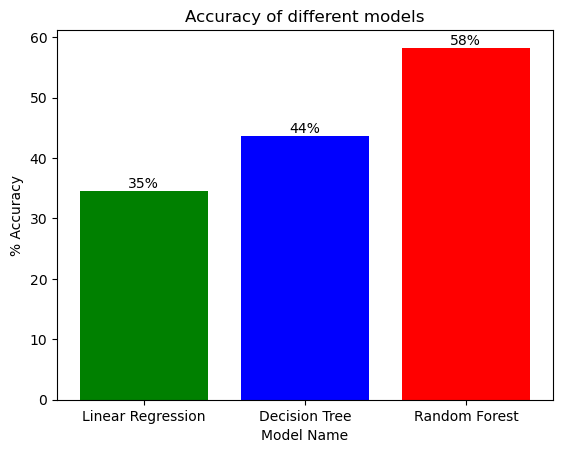

In [30]:
score = [r2_score_LR*100, r2_score_DT*100 , r2_score_RF*100]
label = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.bar(label, score, color = ["Green", "Blue", "Red"])

for i in range(len(score)):
    plt.text(x = (i-0.1), y = score[i]+0.5, s = str(round(score[i]))+"%")
plt.xlabel('Model Name')
plt.ylabel('% Accuracy')
plt.title('Accuracy of different models')
plt.savefig('Accuracy of different models')
plt.show()

From the above plot we can observe that the Random Forest model have high accuracy than other model.\
Therefore we can use Random Forest model instead of other models.

Below we can observe the result of the predicted values with the actual values.

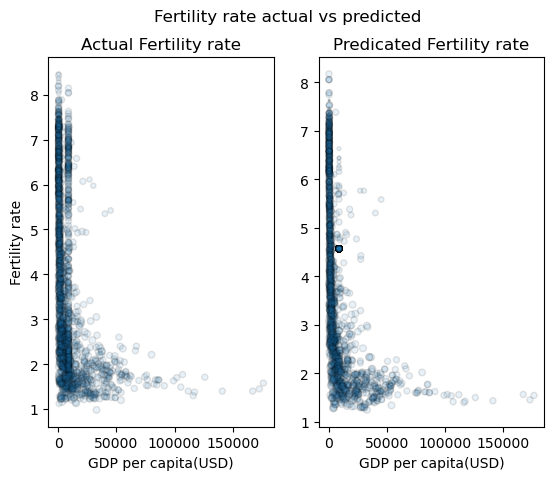

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Fertility rate actual vs predicted')

ax1.scatter(F_X_test.GDP_PC, F_y_test, s = (F_X_test.Literacy), alpha = 0.1, edgecolor = 'black', marker ='.')
ax1.set_title('Actual Fertility rate')
ax1.set_xlabel('GDP per capita(USD)')
ax1.set_ylabel('Fertility rate')

ax2.scatter(F_X_test.GDP_PC, F_y_pred, s = (F_X_test.Literacy), alpha = 0.1, edgecolor = 'black', marker ='.')
ax2.set_title('Predicated Fertility rate')
ax2.set_xlabel('GDP per capita(USD)')
plt.savefig('Fertility rate actual vs predicted')
plt.show()

We have used multiple models to predict the GDP value from Import and Export.\
We have used Linear Regression and Random Forest model for comparison.\
We are using testing data to predict the accuracy of the model to compare with other models and decide which model to use.

Linear Regression

In [32]:
GDP_X_train, GDP_X_test, GDP_y_train, GDP_y_test, GDP_regr_LM = getGDPModelLR(final_df)

In [33]:
GDP_y_pred = GDP_regr_LM.predict(GDP_X_test)
GDP_r2_score_LR = r2_score(GDP_y_test, GDP_y_pred)
print("mean_squared_error:",mean_squared_error(GDP_y_test, GDP_y_pred))
print('r2_score:',r2_score(GDP_y_test, GDP_y_pred))
print(GDP_regr_LM.score(GDP_X_test, GDP_y_test))

mean_squared_error: 1.8960890465323284e+23
r2_score: 0.8654696068241696
0.8654696068241696


For Linear Regression we can observe that the accuracy is 86%, which is a good accuracy for model.

Random Forest

In [34]:
GDP_X_train, GDP_X_test, GDP_y_train, GDP_y_test, GDP_regr_RF = getGDPModelRF(final_df)

In [35]:
GDP_y_pred = GDP_regr_RF.predict(GDP_X_test)
GDP_r2_score_RF = r2_score(GDP_y_test, GDP_y_pred)
print("mean_squared_error:",mean_squared_error(GDP_y_test, GDP_y_pred))
print('r2_score:',r2_score(GDP_y_test, GDP_y_pred))
print(GDP_regr_RF.score(GDP_X_test, GDP_y_test))

mean_squared_error: 5.791912149271848e+22
r2_score: 0.9589055049863595
0.9589055049863595


For Random Forest we can observe that the accuracy is 95%, which is better than the Linear Regression model's accuracy.\
We can compare the accuracy score in the below plot.

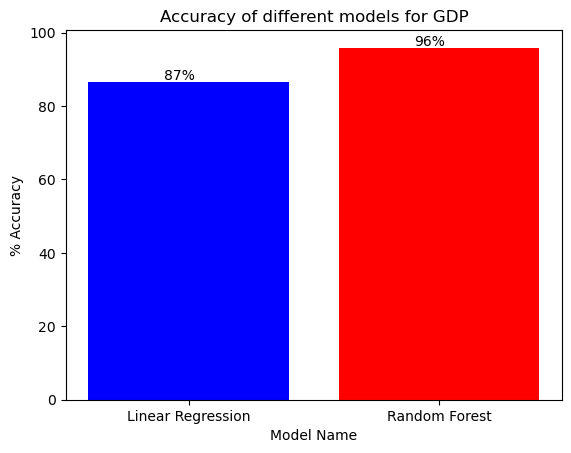

In [36]:
score = [GDP_r2_score_LR*100, GDP_r2_score_RF*100]
label = ['Linear Regression', 'Random Forest']

plt.bar(label, score, color = [ "Blue", "Red"])

for i in range(len(score)):
    plt.text(x = (i-0.1), y = score[i]+0.5, s = str(round(score[i]))+"%")
plt.xlabel('Model Name')
plt.ylabel('% Accuracy')
plt.title('Accuracy of different models for GDP')
plt.savefig('Accuracy of different models for GDP')
plt.show()

From the above plot we can observe that the Random Forest model have high accuracy than other model.
Therefore we can use Random Forest model instead of other models.

Below we can observe the result of the predicted values with the actual values.

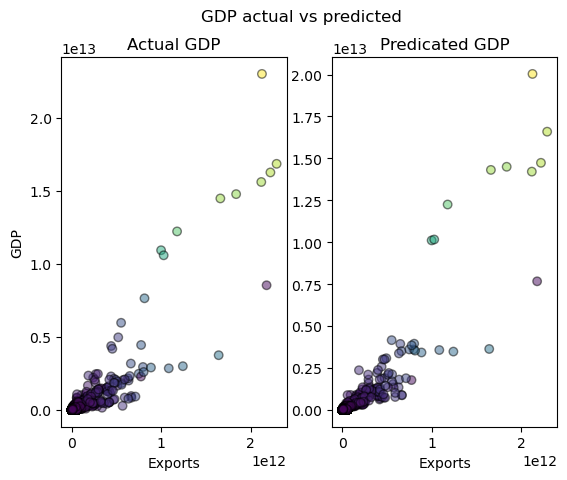

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('GDP actual vs predicted')

ax1.scatter(GDP_X_test.Exports, GDP_y_test, s = 150, c = (GDP_X_test.Imports), alpha = 0.5, edgecolor = 'black', marker ='.')
ax1.set_title('Actual GDP')
ax1.set_xlabel('Exports')
ax1.set_ylabel('GDP')

ax2.scatter(GDP_X_test.Exports, GDP_y_pred, s = 150, c = (GDP_X_test.Imports), alpha = 0.5, edgecolor = 'black', marker ='.')
ax2.set_title('Predicated GDP')
ax2.set_xlabel('Exports')

plt.savefig('GDP actual vs predicted')
plt.show()